In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Below the NFL odds data was condensed down from 2007-2022 to 2017-2022. As out headlines data was also from 2017-2022. New data was saved as filtered_df and a new csv file was created for the 2017-2022 data. The Date column was also transformed into a more suitable format for analysis  as well.

In [2]:
NFLOdds= pd.read_csv('NFL_Odds_Data_2007-2022.csv',encoding= 'latin1',low_memory=False)
NFLOdds['Date']= pd.to_datetime(NFLOdds['Date'])

start_date= '2017-08-20'
end_date= '2022-02-13'
mask= (NFLOdds['Date']>=start_date)&(NFLOdds['Date']<=end_date)
filtered_df= NFLOdds.loc[mask]
filtered_df.to_csv('New_NFL_Odds_Data_2017-2022.csv', index=False)

Below some data cleaning took place as the data had some outliers in error like having 4 digits in the Moneyline_away and Moneyline_home columns so both columns were reduced to only have 3 digits. As money lines are normally 3 digits.

In [3]:
filtered_df['Moneyline_away']= filtered_df['Moneyline_away'].apply(lambda x: x//10 if abs(x)> 999 else x)
filtered_df['Moneyline_home']= filtered_df['Moneyline_home'].apply(lambda x: x//10 if abs(x)> 999 else x)


Below two histograms were created one for home team money line and one for away team money line so we could see at what frequency the money line is set more commonly between 2017-2022 for home and away. It was found that money line is never set at zero for home or away teams. As well as the frequency for positive money lines for home teams is greater while the frequency for negative money lines for away teams is greater. So, meaning the away team is expected to get a win over the home team which is a little intersting to see.

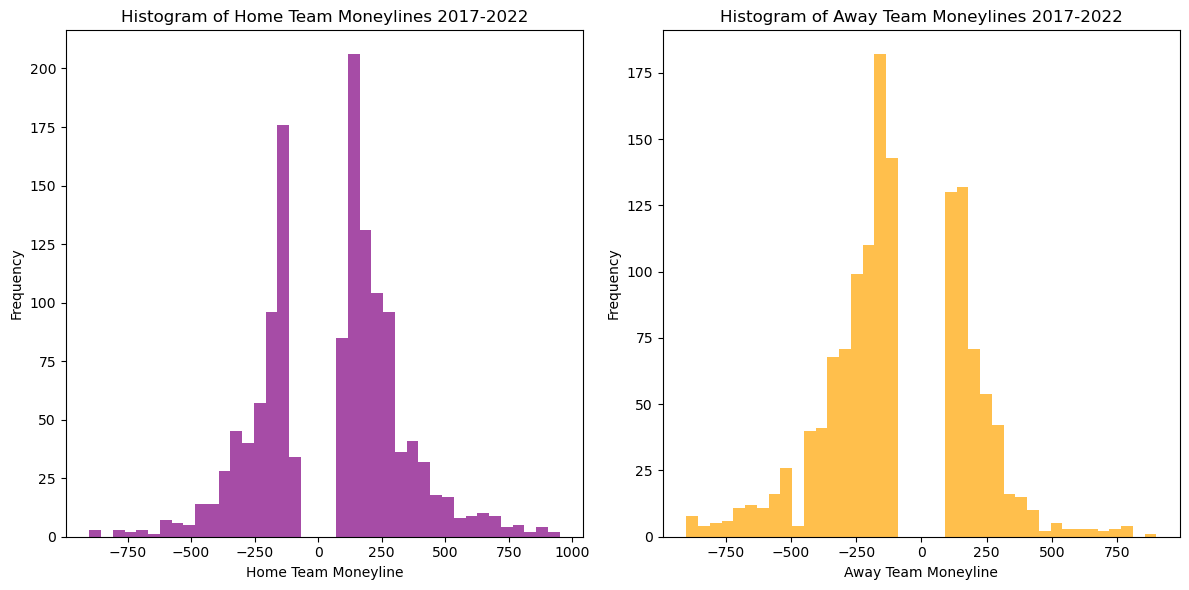

In [4]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.hist(filtered_df['Moneyline_home'],bins= 40,color= 'purple',alpha= 0.7)
plt.title('Histogram of Home Team Moneylines 2017-2022')
plt.xlabel('Home Team Moneyline')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(filtered_df['Moneyline_away'], bins= 40,color= 'orange',alpha=0.7)
plt.title('Histogram of Away Team Moneylines 2017-2022')
plt.xlabel('Away Team Moneyline')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Below the average money line for home and away teams was calculated. It’s a bit interesting to see that according to money lines the away team is expected to win on average with its average being negative and the home teams average being positive.

In [5]:
Moneyline_homeAvg= filtered_df['Moneyline_home'].mean()
Moneyline_awayAvg= filtered_df['Moneyline_away'].mean()

print(f"Average Moneyline for Home Teams 2017-2022: {Moneyline_homeAvg}")
print(f"Average Moneyline for Away Teams 2017-2022: {Moneyline_awayAvg}")

Average Moneyline for Home Teams 2017-2022: 60.246119733924616
Average Moneyline for Away Teams 2017-2022: -95.17738359201773


Below a boxplot was created for money lines for home teams and away teams. This was interesting to see as the median money line for away teams was negative and for home teams it was positive. We also had some outliers for both home and away teams where the money line was a bit higher or lower than normal. So essentially what we are seeing is away teams are expected to win based on the money lines set and the home team is expected to lose. As negative money lines mean a team is expected to win and a positive money line means a team is expected to lose.

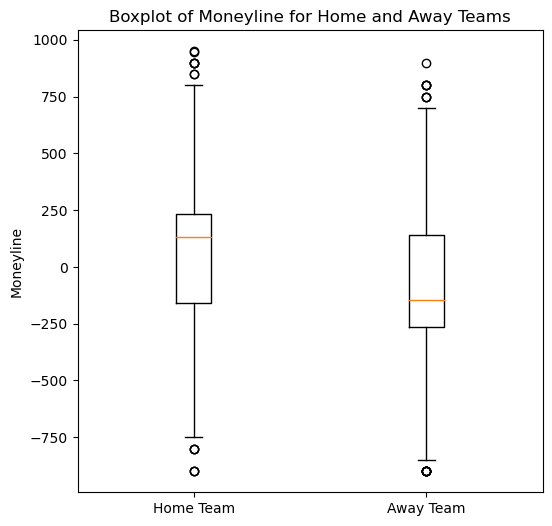

In [6]:
plt.figure(figsize= (6,6))
plt.boxplot([filtered_df['Moneyline_home'],filtered_df['Moneyline_away']],labels= ['Home Team','Away Team'])
plt.title('Boxplot of Moneyline for Home and Away Teams')
plt.ylabel('Moneyline')
plt.show()

Below a time, series plot was created just to see how money lines for home and away teams have changed over time. So, between 2017 and 2022 we have had 5 seasons played so you can see the 5 distinctive groups with the breaks being the off seasons when no games are played so you just have a single line for away and home showing. But back in 2017 you can see the money line being positive for home teams more often and negative for away teams but as the years progress, we see more of a split with home and away teams sharing negative and positive money lines more often. So, we are seeing more often home teams being expected to win as the years progress rather then back in 2017 when aways teams were expected to win according to money lines.

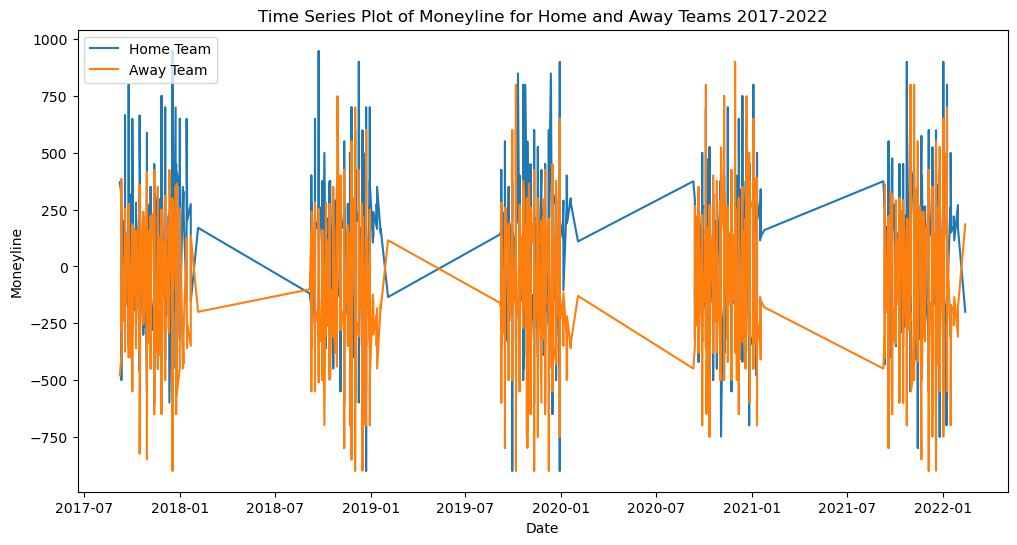

In [7]:
filtered_df.set_index('Date',inplace= True)
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Moneyline_home'],label= 'Home Team')
plt.plot(filtered_df['Moneyline_away'],label= 'Away Team')
plt.xlabel('Date')
plt.ylabel('Moneyline')
plt.title('Time Series Plot of Moneyline for Home and Away Teams 2017-2022')
plt.legend()
plt.show()